# Linear Reggresion on boston Dataset

In [1]:
import pandas as pd 
import numpy as np
from sklearn.datasets import load_boston 

In [4]:
house_data = load_boston()
print(house_data["DESCR"])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
X = pd.DataFrame(house_data["data"],columns=house_data["feature_names"])
y = house_data['target']

X.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


array([[<AxesSubplot:title={'center':'CRIM'}>,
        <AxesSubplot:title={'center':'ZN'}>,
        <AxesSubplot:title={'center':'INDUS'}>,
        <AxesSubplot:title={'center':'CHAS'}>],
       [<AxesSubplot:title={'center':'NOX'}>,
        <AxesSubplot:title={'center':'RM'}>,
        <AxesSubplot:title={'center':'AGE'}>,
        <AxesSubplot:title={'center':'DIS'}>],
       [<AxesSubplot:title={'center':'RAD'}>,
        <AxesSubplot:title={'center':'TAX'}>,
        <AxesSubplot:title={'center':'PTRATIO'}>,
        <AxesSubplot:title={'center':'B'}>],
       [<AxesSubplot:title={'center':'LSTAT'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

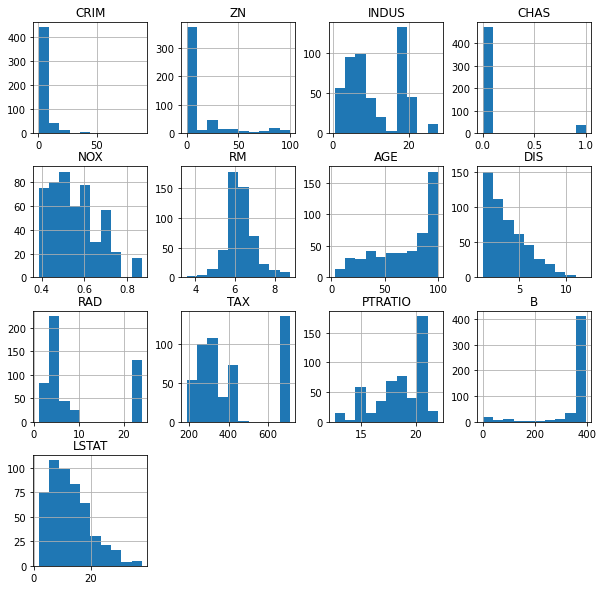

In [9]:
X.hist(X.columns,figsize=(10,10))

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

<AxesSubplot:>

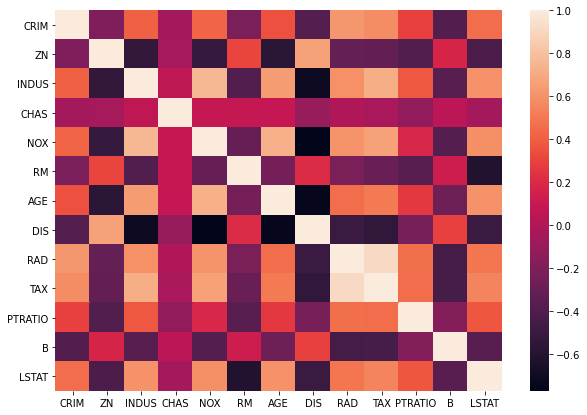

In [12]:
plt.figure(figsize=(10,7))
sns.heatmap(X.corr())

In [13]:
from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.7)

In [14]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.fit_transform(x_test)

In [15]:
np.std(x_train,axis=0)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [41]:
from sklearn.linear_model import LinearRegression,LogisticRegression

model = LinearRegression()

model.fit(x_train,y_train)

y_train_prediction = model.predict(x_train)
y_test_prediction = model.predict(x_test)

<BarContainer object of 13 artists>

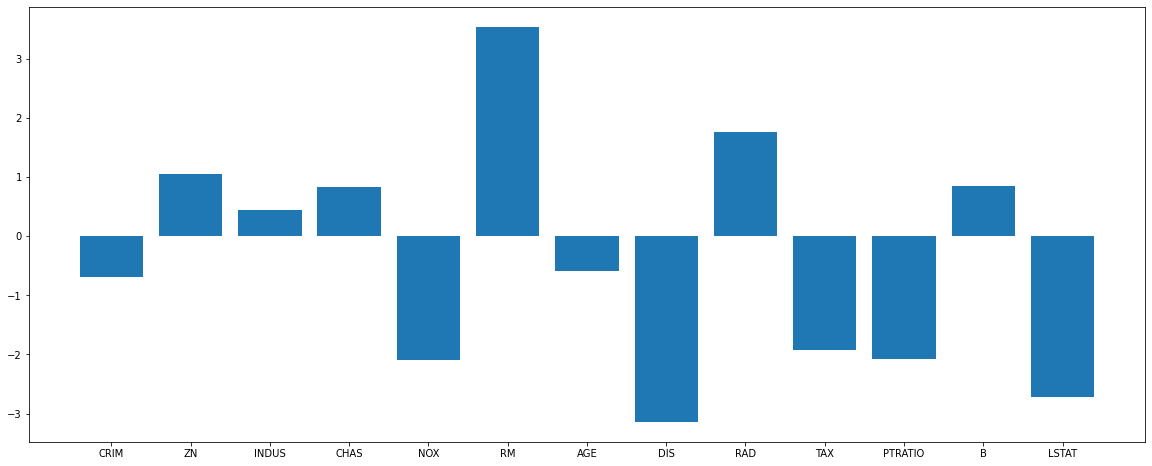

In [18]:
plt.figure(figsize=(20,8))
plt.bar(X.columns,model.coef_)

In [21]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

print('Train MSE: {}'.format(mean_squared_error(y_train,y_train_prediction)))
print('Train MSE: {}'.format(mean_squared_error(y_test,y_test_prediction)))

print('Train MAE: {}'.format(mean_absolute_error(y_train,y_train_prediction)))
print('Train MAE: {}'.format(mean_absolute_error(y_test,y_test_prediction)))

Train MSE: 17.472384928316124
Train MSE: 35.32463003161241
Train MAE: 2.9869545439040106
Train MAE: 3.7782210873048463


In [20]:
y.mean()

22.532806324110677

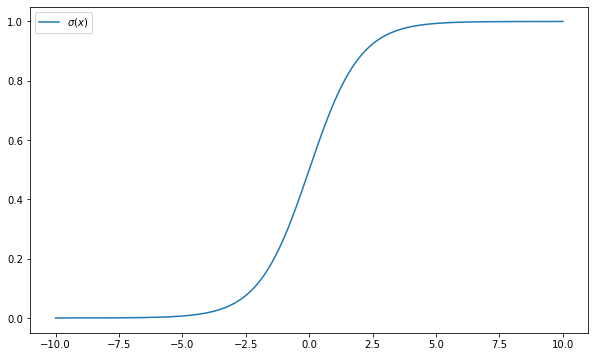

In [32]:
grid = np.linspace(-10,10,300)

plt.figure(figsize=(10,6))
plt.plot(grid,1./(1+np.exp(-grid)),label='$\sigma(x)$')
plt.legend()
plt.show()

In [36]:
from sklearn.datasets import make_blobs 

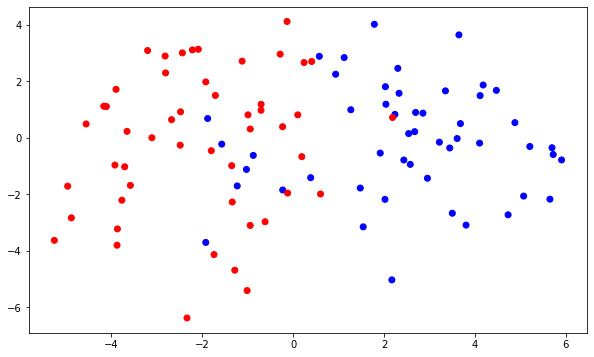

In [39]:
colors = ("red","blue")
X,y = make_blobs(n_samples=100,centers=[[-2,0],[2,0]],random_state=20,cluster_std=2)

colored_y = np.zeros(y.size,dtype=str)
for i in range(2):
    colored_y[y == i] = colors[i]
    
plt.figure(figsize=(10,6))
plt.scatter(X[:,0],X[:,1],c = colored_y)

In [44]:
model = LogisticRegression() 
model.fit(X,y)

LogisticRegression()

In [45]:
print('Вектор w равен {}, свободный член w равен {}'.format(model.coef_[0],model.intercept_[0
                                                                                           ]))

Вектор w равен [ 1.13278866 -0.13748293], свободный член w равен -0.11995755619445762


In [53]:
x_min,x_max = -12,12
y_min,y_max =-10,10
h = 0.05
from matplotlib.colors import ListedColormap
cmap_light = ListedColormap(["#FFAAAA","#AAFFAA","#AAAAFF"])

<ipython-input-54-6aec2ebe54b5>:11: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx,yy,Z,cmap=cmap_light)


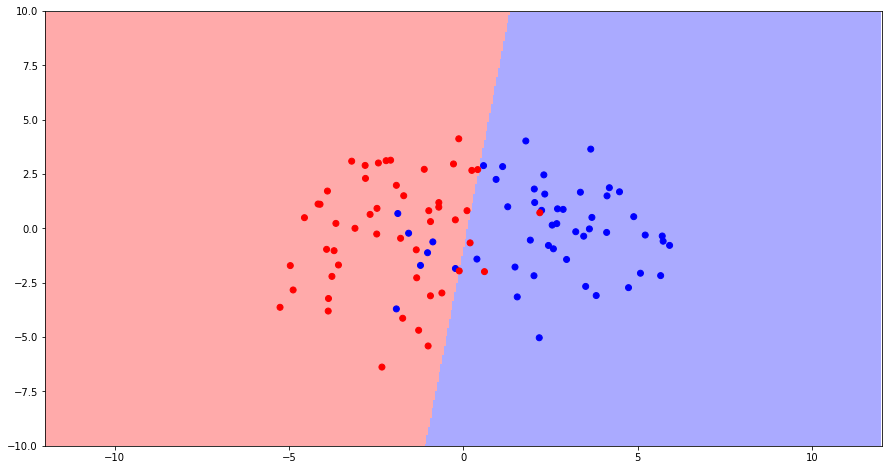

In [54]:
plt.figure(figsize=(15,8))

plt.xlim((x_min,x_max))
plt.ylim((y_min,y_max))
xx,yy = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h))

Z = model.predict(np.c_[xx.ravel(),yy.ravel()])

Z = Z.reshape(xx.shape)

plt.pcolormesh(xx,yy,Z,cmap=cmap_light)
plt.scatter(X[:,0],X[:,1],c=colored_y)
plt.show()